# Gradient boosting

We started with a decision tree and a linear regressor. That last one lost because we made the data non-linear. Next we used Bagging on the decision tree to create a random forest. That was worse, but some tuning fixed it.

Now we'll be doing boosting in the same dataset, starting with gradient boosting.

## Data import

We exported the data before into a pickle-file. That means we can quite simply import it here [again](https://en.wikipedia.org/wiki/D%C3%A9j%C3%A0_vu).

In [1]:
import pickle

# Load the pickle file
with open('exports/non_linear_data.pkl', 'rb') as file:
    data_dict = pickle.load(file)

# Display the loaded data

X = data_dict["X"]
y = data_dict["y"]
X_train = data_dict["X_train"]
X_test = data_dict["X_test"]
y_train = data_dict["y_train"]
y_test = data_dict["y_test"]

## Create model

With all the data ready in files, creating and training the model shouldn't be a problem.

... or maybe there is on thing that will be annoying. Look at the following code:

In [2]:
y_train

array([[ 3.24626917e+00],
       [ 2.18314287e+01],
       [ 1.27526412e+00],
       [ 6.24233942e+00],
       [ 1.02461700e+01],
       [-3.92692037e+00],
       [ 8.80519773e+00],
       [ 5.74951230e+00],
       [ 1.11971179e+01],
       [ 1.86201169e+00],
       [ 3.06470535e+00],
       [ 1.68344735e+01],
       [ 7.88669006e+00],
       [-2.20271473e+00],
       [ 2.08545416e+01],
       [ 1.12872492e+01],
       [ 5.66780804e+00],
       [ 8.78669237e+00],
       [ 2.37581595e+00],
       [ 2.25299730e+00],
       [ 3.29577705e+00],
       [ 4.64592573e+00],
       [ 7.75670452e+00],
       [ 1.01372001e+00],
       [ 7.05592119e+00],
       [ 3.12442717e+00],
       [ 1.71862903e+01],
       [ 2.06458324e+00],
       [ 9.86872768e-01],
       [ 1.30535363e+01],
       [ 2.97600814e-01],
       [-1.76885898e+00],
       [ 2.09007324e+01],
       [ 7.50129964e+00],
       [-1.28425689e+00],
       [ 3.00913549e-02],
       [ 5.02763912e-01],
       [ 1.46479506e+00],
       [ 1.1

Notice anything particular?

![](files/2025-05-10-11-02-54.png)

This isn't a list of values, of a list of lists with one item, the value being the one item. That means something has gone wrong before, but since we have other models depending on the data being this way it's a bad idea to start changing the data generation-process.

If online there we some way to [ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) this list into a clean list?

In [3]:
#DELETE

y_train.ravel()

array([ 3.24626917e+00,  2.18314287e+01,  1.27526412e+00,  6.24233942e+00,
        1.02461700e+01, -3.92692037e+00,  8.80519773e+00,  5.74951230e+00,
        1.11971179e+01,  1.86201169e+00,  3.06470535e+00,  1.68344735e+01,
        7.88669006e+00, -2.20271473e+00,  2.08545416e+01,  1.12872492e+01,
        5.66780804e+00,  8.78669237e+00,  2.37581595e+00,  2.25299730e+00,
        3.29577705e+00,  4.64592573e+00,  7.75670452e+00,  1.01372001e+00,
        7.05592119e+00,  3.12442717e+00,  1.71862903e+01,  2.06458324e+00,
        9.86872768e-01,  1.30535363e+01,  2.97600814e-01, -1.76885898e+00,
        2.09007324e+01,  7.50129964e+00, -1.28425689e+00,  3.00913549e-02,
        5.02763912e-01,  1.46479506e+00,  1.17217819e-01,  9.61471005e+00,
       -1.71580720e+00,  6.28543348e+00,  2.23918961e+01,  3.97260848e-01,
        4.13843519e+00,  6.82519859e+00,  1.07034855e+00,  1.47014416e+00,
        6.94985388e+00,  2.17555669e+01,  9.87060974e-01, -1.56383816e+00,
       -3.93031669e+00,  

Feeling generous I'll save you the trouble of creating the model yourself and simply give the code.

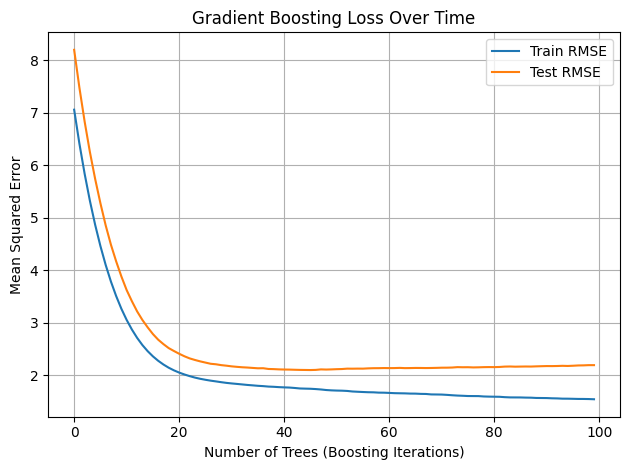

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Initialize model with warm_start=True to allow tracking
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, warm_start=True, random_state=42)

# Track training and test loss
train_losses = []
test_losses = []

for i in range(1, 101):  # up to 100 trees
    gbr.n_estimators = i
    gbr.fit(X_train, y_train.ravel())

    # Predict and calculate RMSE
    y_train_pred = gbr.predict(X_train)
    y_test_pred = gbr.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test.ravel(), y_test_pred.ravel()))

    train_losses.append(train_rmse)
    test_losses.append(test_rmse)

# Plot loss curves
plt.plot(train_losses, label="Train RMSE")
plt.plot(test_losses, label="Test RMSE")
plt.xlabel("Number of Trees (Boosting Iterations)")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Loss Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This code wasn't simply creating and running the model, but creating and running the model 100 times with increasing estimators. It allowed us to plot the loss-curve.

The loss-curve shows how in the beginning the RMSE is bad but get's better quite fast. After a while we see the blue and orange line growing apart again. This means the model is getting to specific and learns the train-set by heart. Overfitting, in other words.

The effect isn't huge, but it's there. The difficulty is seeing the exact point where they start splitting. Maybe 45?

Now create a model with 45 estimators and train it.

In [5]:
#DELETE
# Create and fit the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=46, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train.ravel())  # Use ravel() to flatten y_train

# Make predictions
y_pred = gbr.predict(X_test)

# Calculate Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error: {rmse}')


Mean Squared Error: 2.102439392902171


You'll note that playing around with the number of estimators 44 makes it go up again, but 46 lowers it further. But who do we hear coming around the corner?

![](files/2025-05-10-11-34-02.png)

We're doing hyperparameter tuning without using a validation set! And while tuning is not a crime, tuning without a validation set is (unless we use KFold).

But why, I hear you asking. Why can't we simply continue using this amount of estimators? Because a low RMSE here is **not** the goal. The RMSE on the test-set is supposed to be an indication of the RMSE on inference, which is predicting values that didn't occur in the test or the training set, and of which we have no idea what the value of Y will be. We want to predict those with the best possible model, and the RMSE on the test-set is the only way of doing that.

But if we start using the test-set in training we start cheating and start to favour models that work with our particular test-set. Doing that will make our RMSE less reliable and will therefore take away our only way of knowing how good the model will perform and, what is worse, lower the quality of the model on unseen data (to which we don't know the answer).

So yes, tuning without a validation is a crime.

## Tuning with KFold

Use a KFold with 5 folds and range the estimators from 1 to 100. Keep the rmse-scores in a list and select the lowest number in that list.

Note how in the code below we're not using the train/test split but we're going back to the original X and y.

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Create a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the range of n_estimators to test
n_estimators_range = range(1, 101)
mean_rmse_scores = []

# Perform k-fold cross-validation for each n_estimators
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

for n_estimators in n_estimators_range:
    gbr.n_estimators = n_estimators
    # Use cross_val_score to evaluate the model using negative mean squared error
    rmse_scores = cross_val_score(gbr, X, y.ravel(), cv=kf, scoring='neg_mean_squared_error')
    mean_rmse_scores.append(np.sqrt(-np.mean(rmse_scores)))  # Negate to get positive RMSE

# Find the best number of estimators
best_n_estimators = n_estimators_range[np.argmin(mean_rmse_scores)]
best_rmse = min(mean_rmse_scores)

print(f'Best number of estimators: {best_n_estimators} with RMSE: {best_rmse:.3f}')

Best number of estimators: 39 with RMSE: 2.115


We have 39 now, with an RMSE of 2.115, which is a bit higher than our 2.102. Train a final model on the original train/test split.

In [7]:
#DELETE
# Now fit the final model with the best number of estimators on the full dataset
final_gbr = GradientBoostingRegressor(n_estimators=39, random_state=42)
final_gbr.fit(X_train, y_train.ravel())

y_pred_gradientbooster = final_gbr.predict(X_test)

# Calculate Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gradientbooster))
print(f'Mean Squared Error: {rmse}')

Mean Squared Error: 2.1199609791553686


Finally, we'll store the predictions of this model. (Change the name of y_pred if you used another).

In [8]:
with open('exports/y_pred_gradientbooster.pkl', 'wb') as f:
    pickle.dump(y_pred_gradientbooster, f)